In [22]:
# 1. 기본
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2. 데이터 가져오기
import pandas as pd
from sklearn import datasets

# 3. 훈련데이터와 테스트데이터 분리작업
from sklearn.model_selection import train_test_split

# 4. 분류모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# 5. 모델검정
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

# 6. 최적화
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import seaborn as sns



In [23]:
red = pd.read_csv('D:/python3/data/winequality-red.csv')

In [24]:
# red['quality'] = red['quality'].replace([3,4,5,6,7,8],[0,1,2,3,4,5])

In [25]:
red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [26]:
X = red.drop(['quality','fixed acidity','citric acid',
              'free sulfur dioxide','residual sugar','density'],axis = 1)
y = red['quality']

In [27]:
X.shape

(1599, 6)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    stratify = y,
    test_size = 0.3, random_state=0)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# from tensorflow.keras.utils import to_categorical
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [31]:
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

In [38]:
X_train.shape

(1119, 6)

In [37]:
y_train = np.array(y_train)
y_train.shape

(1119,)

In [48]:
model=Sequential()

model.add(Dense(32, activation='relu',input_shape=(6,)))

model.add(Dense(16, input_dim=6, activation='softmax'))
# sgd=optimizers.SGD(lr=0.01)
# 학습률(learning rate, lr)은 0.01로 합니다.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# 옵티마이저는 경사하강법의 일종인 adam을 사용합니다.
# 손실 함수(Loss function)는 크로스 엔트로피 함수를 사용합니다.
history = model.fit(X_train,y_train, epochs=200)
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.

Train on 1119 samples
Epoch 1/200
1119/1119 [==============================] - 0s 255us/sample - loss: 2.5669 - accuracy: 0.1912
Epoch 2/200
1119/1119 [==============================] - 0s 36us/sample - loss: 2.1531 - accuracy: 0.3977
Epoch 3/200
1119/1119 [==============================] - 0s 34us/sample - loss: 1.8089 - accuracy: 0.4844
Epoch 4/200
1119/1119 [==============================] - 0s 34us/sample - loss: 1.5417 - accuracy: 0.5237
Epoch 5/200
1119/1119 [==============================] - 0s 34us/sample - loss: 1.3525 - accuracy: 0.5567
Epoch 6/200
1119/1119 [==============================] - 0s 36us/sample - loss: 1.2295 - accuracy: 0.5684
Epoch 7/200
1119/1119 [==============================] - 0s 37us/sample - loss: 1.1507 - accuracy: 0.5773
Epoch 8/200
1119/1119 [==============================] - 0s 34us/sample - loss: 1.1021 - accuracy: 0.5845
Epoch 9/200
1119/1119 [==============================] - 0s 36us/sample - loss: 1.0707 - accuracy: 0.5916
Epoch 10/200
1119/1119 

1119/1119 [==============================] - 0s 35us/sample - loss: 0.8768 - accuracy: 0.6095
Epoch 78/200
1119/1119 [==============================] - 0s 33us/sample - loss: 0.8760 - accuracy: 0.6095
Epoch 79/200
1119/1119 [==============================] - 0s 36us/sample - loss: 0.8755 - accuracy: 0.6077
Epoch 80/200
1119/1119 [==============================] - 0s 33us/sample - loss: 0.8749 - accuracy: 0.6059
Epoch 81/200
1119/1119 [==============================] - 0s 33us/sample - loss: 0.8733 - accuracy: 0.6068
Epoch 82/200
1119/1119 [==============================] - 0s 35us/sample - loss: 0.8735 - accuracy: 0.6104
Epoch 83/200
1119/1119 [==============================] - 0s 35us/sample - loss: 0.8730 - accuracy: 0.6041
Epoch 84/200
1119/1119 [==============================] - 0s 36us/sample - loss: 0.8714 - accuracy: 0.6095
Epoch 85/200
1119/1119 [==============================] - 0s 33us/sample - loss: 0.8709 - accuracy: 0.6041
Epoch 86/200
1119/1119 [==========================

1119/1119 [==============================] - 0s 36us/sample - loss: 0.8430 - accuracy: 0.6238
Epoch 154/200
1119/1119 [==============================] - 0s 34us/sample - loss: 0.8408 - accuracy: 0.6256
Epoch 155/200
1119/1119 [==============================] - 0s 35us/sample - loss: 0.8414 - accuracy: 0.6265
Epoch 156/200
1119/1119 [==============================] - 0s 36us/sample - loss: 0.8417 - accuracy: 0.6184
Epoch 157/200
1119/1119 [==============================] - 0s 34us/sample - loss: 0.8400 - accuracy: 0.6247
Epoch 158/200
1119/1119 [==============================] - 0s 36us/sample - loss: 0.8399 - accuracy: 0.6309
Epoch 159/200
1119/1119 [==============================] - 0s 33us/sample - loss: 0.8389 - accuracy: 0.6300
Epoch 160/200
1119/1119 [==============================] - 0s 35us/sample - loss: 0.8401 - accuracy: 0.6273
Epoch 161/200
1119/1119 [==============================] - 0s 33us/sample - loss: 0.8391 - accuracy: 0.6300
Epoch 162/200
1119/1119 [=================

In [616]:
# 정규화

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# 로지스틱

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [31]:
print("accuracy : %.2f" % accuracy_score(y_test, y_pred))

accuracy : 0.59


In [19]:
y_pred_df = pd.DataFrame(y_pred)

NameError: name 'y_pred' is not defined

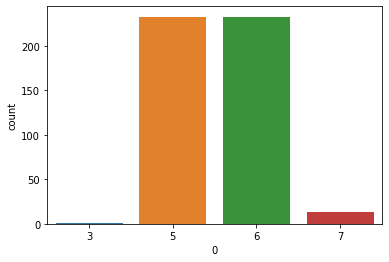

In [33]:
sns.countplot(x=0, data=a)

In [531]:
y_pred = model.predict(X_test)
y_pred_probability = model.predict_proba(X_test)[:,1]

In [486]:
print(model.coef_) residual sugar,density

[[ 0.00334962  0.76225907  0.00519237  0.17282093  0.43813875 -0.06711195
  -0.61968311  0.16386108  0.28700862 -0.34974247 -0.20112592]
 [ 0.48372175  0.48561013  0.11251082  0.25649178  0.24363733 -0.18331724
  -0.27557017 -0.43478106  0.51284655 -0.29577961 -0.45991755]
 [-0.47720592  0.30003478  0.23667064 -0.18580587  0.10830762 -0.19399059
   0.5626229   0.40077503 -0.06280973 -0.43901915 -0.81742455]
 [-0.14496758 -0.28101491 -0.28466208 -0.13329328  0.00324905  0.25960812
  -0.41318483  0.22509075 -0.11813557  0.13026245  0.40234701]
 [ 0.73133074 -0.42091684 -0.01077496  0.38688806 -0.52908183  0.13423307
  -0.38591867 -0.53947786  0.08802277  0.53631719  0.62589657]
 [-0.22963945  0.03327322  0.39080647 -0.15120911 -0.51496532 -0.03343131
  -0.38847211 -0.07183316 -0.33258513  0.43494546  0.74687588]]


In [533]:
print(model.coef_)

[[ 0.76937865  0.42351735 -0.61769549  0.25186761 -0.32504598 -0.24340449]
 [ 0.45653561  0.23584783 -0.37841513  0.2007388  -0.31880739 -0.21338195]
 [ 0.25561538  0.1600828   0.45270132  0.07228781 -0.38210525 -0.98563262]
 [-0.16803181 -0.02846937 -0.24503314  0.10127878  0.14450726  0.24018059]
 [-0.51965655 -0.51204507 -0.30807065 -0.3192516   0.4582953   0.8822761 ]
 [-0.13238086 -0.50756501 -0.39043135 -0.31344662  0.43284665  0.80739816]]


In [446]:
red    fixed acidity   citric acid    free sulfur dioxide

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [534]:
X

,volatile acidity,chlorides,total sulfur dioxide,pH,sulphates,alcohol
0,0.700,0.076,34.0,3.51,0.56,9.4
1,0.880,0.098,67.0,3.20,0.68,9.8
2,0.760,0.092,54.0,3.26,0.65,9.8
3,0.280,0.075,60.0,3.16,0.58,9.8
4,0.700,0.076,34.0,3.51,0.56,9.4
5,0.660,0.075,40.0,3.51,0.56,9.4
6,0.600,0.069,59.0,3.30,0.46,9.4
7,0.650,0.065,21.0,3.39,0.47,10.0
8,0.580,0.073,18.0,3.36,0.57,9.5
9,0.500,0.071,102.0,3.35,0.80,10.5


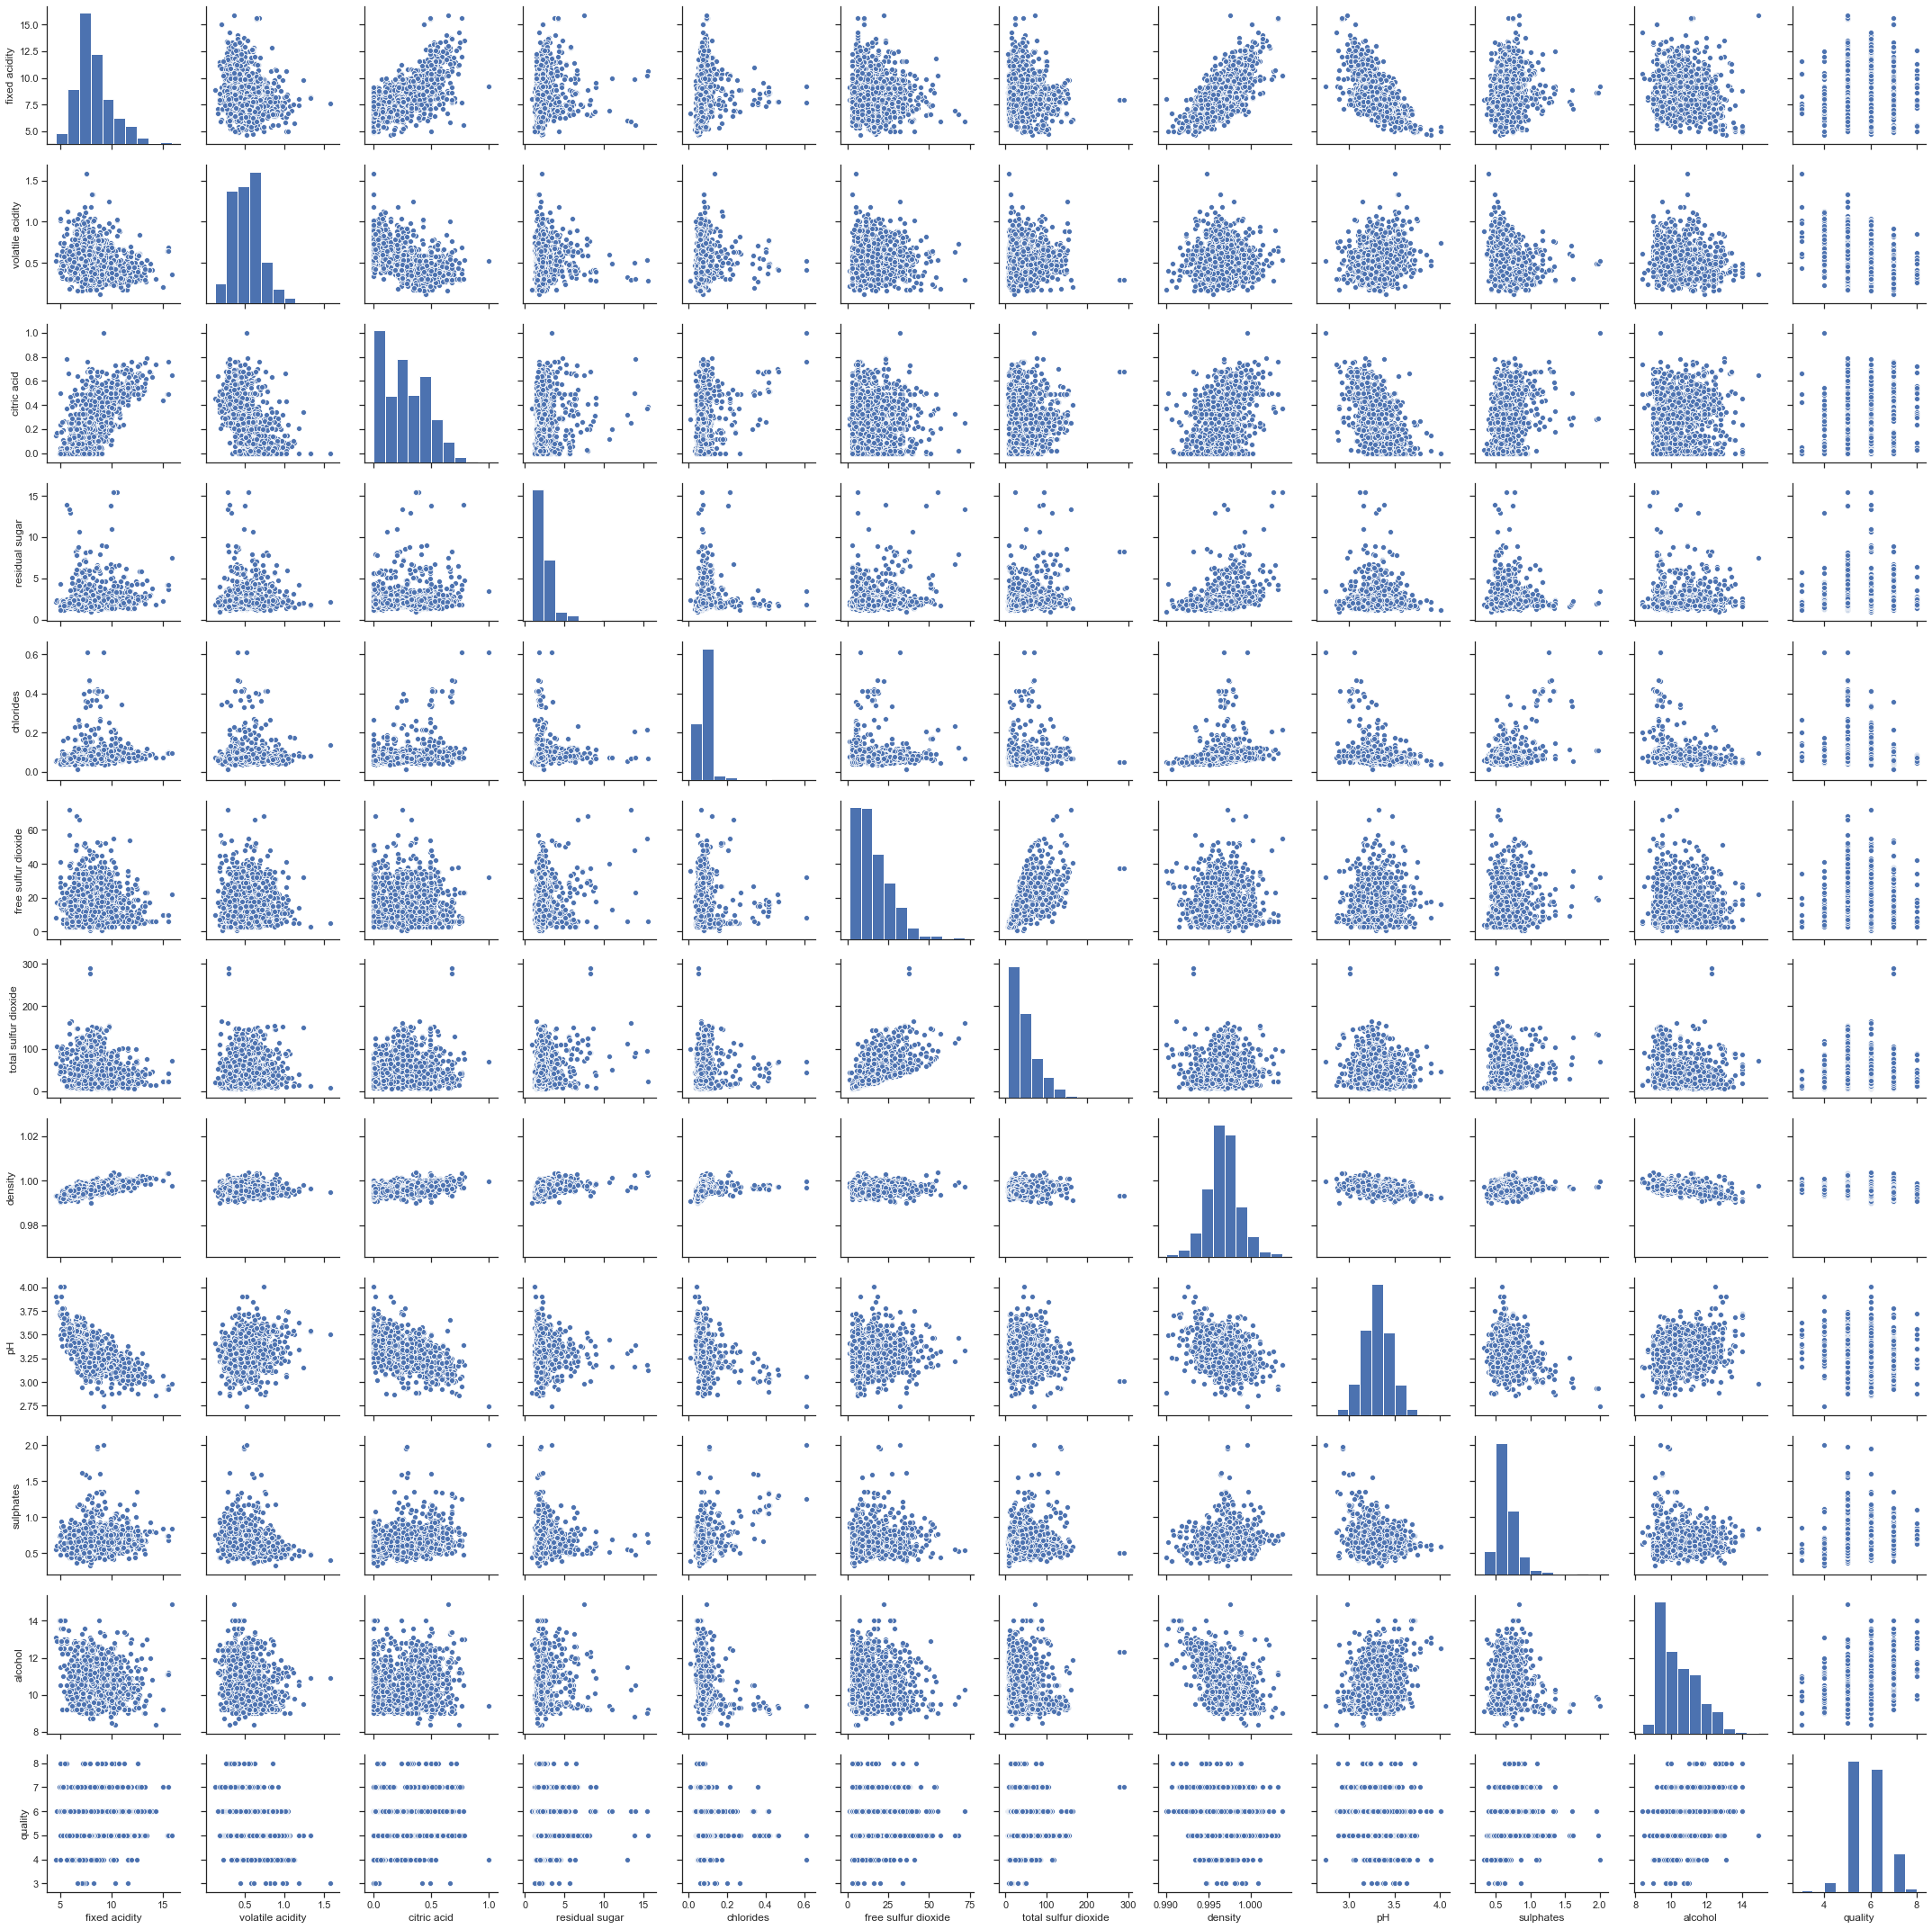

In [537]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(red, palette="husl")

In [541]:
red['quality'] = red['quality'].replace([3,4,5,6,7,8],[0,1,2,3,4,5])

In [543]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [555]:
red['quality']

0       2
1       2
2       2
3       3
4       2
5       2
6       2
7       4
8       4
9       2
10      2
11      2
12      2
13      2
14      2
15      2
16      4
17      2
18      1
19      3
20      3
21      2
22      2
23      2
24      3
25      2
26      2
27      2
28      2
29      3
       ..
1569    3
1570    3
1571    3
1572    2
1573    3
1574    3
1575    3
1576    3
1577    3
1578    3
1579    2
1580    3
1581    2
1582    2
1583    2
1584    4
1585    3
1586    3
1587    3
1588    3
1589    2
1590    3
1591    3
1592    3
1593    3
1594    2
1595    3
1596    3
1597    2
1598    3
Name: quality, Length: 1599, dtype: int64